In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from datetime import timedelta
import pmdarima as pm
from pmdarima.arima import auto_arima
%matplotlib inline

In [26]:
# function for reading the csv
global location
location = "Southern Cross Station"
def new_read(csv,total_hrs=None):
    df = pd.read_csv(csv)
    df = df[["Date","Hour",location]]
    df[location] = pd.to_numeric(df[location],errors="coerce")
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
    df['Date'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Hour'], unit='h')
    df = df[["Date",location]]
    df.set_index("Date", drop=True, inplace=True)
    if total_hrs:
        df = df[:total_hrs]
    return df

In [27]:

files = os.path.join("..\\dataset\\monthly\\", "ds*.csv")
files = glob.glob(files)
df = pd.concat(map(new_read, files))
df


,Southern Cross Station
Date,
2021-03-01 00:00:00,6.0
2021-03-01 01:00:00,2.0
2021-03-01 02:00:00,1.0
2021-03-01 03:00:00,1.0
2021-03-01 04:00:00,NaN
...,...
2021-04-30 19:00:00,267.0
2021-04-30 20:00:00,143.0
2021-04-30 21:00:00,98.0


In [28]:
df = df.dropna()
df

,Southern Cross Station
Date,
2021-03-01 00:00:00,6.0
2021-03-01 01:00:00,2.0
2021-03-01 02:00:00,1.0
2021-03-01 03:00:00,1.0
2021-03-01 05:00:00,21.0
...,...
2021-04-30 19:00:00,267.0
2021-04-30 20:00:00,143.0
2021-04-30 21:00:00,98.0


<AxesSubplot:xlabel='Date'>

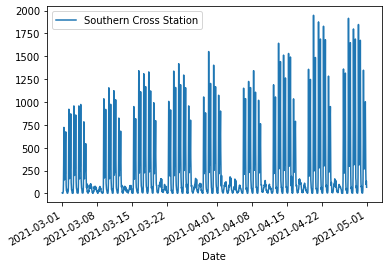

In [29]:
df.plot(kind = 'line')

In [30]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

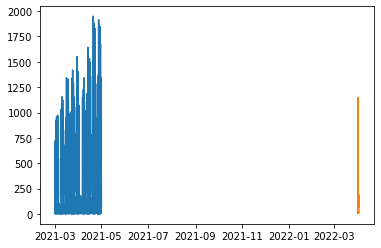

In [22]:
# Alternative
train = df
test = new_read("..\April_2022.csv",total_hrs=48) 
plt.plot(train)
plt.plot(test)

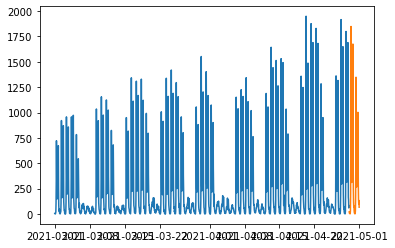

In [31]:
train = df[:-48]
test = df[-48:]
plt.plot(train)
plt.plot(test)

In [ ]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,max_p=5, max_d=5, max_q=5, start_P=0,D=1, start_Q=0, max_P=5, max_D=5,max_Q=5,m=12,seasonal=True,error_action='warn',trace=True,supress_warnings=True, stepwise=True, random_state=20,n_fits=50)

In [32]:
# alternative
arima_model = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=21243.108, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=18651.349, Time=4.88 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=21241.175, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=20320.821, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=18626.212, Time=7.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.26 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=18630.311, Time=2.44 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=19172.973, Time=3.48 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=18571.432, Time=9.85 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=18576.943, Time=2.94 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.48 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,0)(2,1,0)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1399
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -9242.973
Date:                            Sun, 22 May 2022   AIC                          18497.947
Time:                                    17:28:06   BIC                          18529.356
Sample:                                         0   HQIC                         18509.694
                                           - 1399                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7366      0.016     45.055      0.000       0.705       0.769
ar.L2         -0.3527      0.027    -12.945      0.000      -0.406      -0.299
ar.L3          0.2378      0.033      7.282      0.000       0.174       0.302
ar.S.L12      -0.9702      0.040    -24.255      0.000      -1.049      -0.892
ar.S.L24      -0.1507      0.040     -3.764      0.000      -0.229      -0.072
sigma2      3.561e+04    755.059     47.160      0.000    3.41e+04    3.71e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.05   Jarque-Bera (JB):              5159.84
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
prediction = pd.DataFrame(arima_model.predict(n_periods=48),index=test.index)
prediction.columns = ['predicted_count']
prediction["actual_count"] = test[location]
prediction

,predicted_count,actual_count
Date,,
2021-04-28 23:00:00,100.439900,21.0
2021-04-29 00:00:00,34.412479,11.0
2021-04-29 01:00:00,52.997609,5.0
2021-04-29 02:00:00,65.786343,5.0
2021-04-29 04:00:00,60.185361,2.0
2021-04-29 05:00:00,101.028816,29.0
2021-04-29 06:00:00,250.830655,200.0
2021-04-29 07:00:00,418.041906,801.0
2021-04-29 08:00:00,751.424892,1848.0


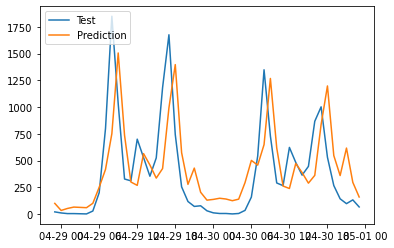

In [34]:
#plt.plot(train, label='Training')
plt.plot(prediction["actual_count"], label='Test')
plt.plot(prediction["predicted_count"], label='Prediction')
plt.legend(loc ='upper left')
plt.show()